In [241]:
import numpy as np
import matplotlib.pyplot as plt

## Question-1 [5 marks]

The matrix `M` is of shape `(m, n)`. Enter $m + n$ as your answer.

<hr>

The variable `M` is defined in the cell given below.

In [242]:
rng = np.random.default_rng(seed = 1001)
m,n,k = rng.integers(100,1000,3)
A = rng.integers(0,5,(m,n))
B = rng.integers(0,5, (n,k))
M = A @ B

In [243]:
# Answer
M.shape
print(M.shape[0] + M.shape[1])

1751


## Question-2 [5 Marks]

The outer product between two column vectors $\mathbf{x}$ and $\mathbf{y}$ is defined as follows:

$$
\mathbf{x} \mathbf{y}^{T}
$$

Find the element in the $100^{th}$ row and $200^{th}$ column of the outer product of the vectors $\mathbf{x}$ and $\mathbf{y}$. Both vectors are specified as single dimensional NumPy arrays in the code-block below.

**Note**: We number rows and columns starting from 1. Rows are from top-bottom, columns are from left-right. For instance:

$$
M = \begin{bmatrix}
1 & 2 & 3\\
4 & 5 & 6\\
7 & 8 & 9
\end{bmatrix}
$$

The first row in $M$ is $\begin{bmatrix}1 & 2 & 3\end{bmatrix}$ and the second column in $M$ is $\begin{bmatrix}2 \\ 5 \\ 8\end{bmatrix}$.

In [244]:
rng = np.random.default_rng(seed = 4813)
x = rng.integers(-100, 100, 400)
y = rng.integers(-100, 100, 500)

In [245]:
# Answer
M = np.outer(x,y)
M[99][199]

np.int64(65)

## Question-3 [6 Marks]

Find the number of solutions to the following equation:

$$
x \sin(2x) = \cos x
$$

where $0 \leqslant x \leqslant 5$.



Number of solutins for this equation is : 4


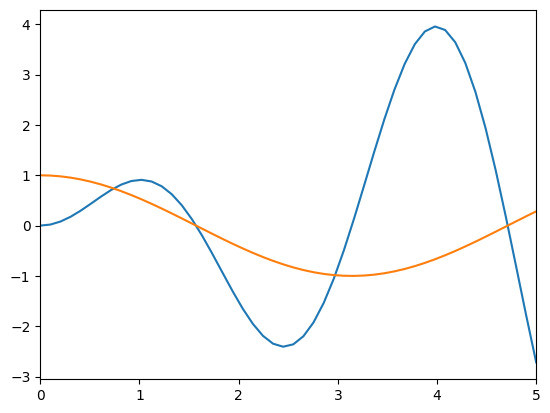

In [246]:
x = np.linspace(0,5)
plt.plot(x, x * np.sin(2 * x))
plt.plot(x, np.cos(x))
plt.xlim([0,5])

print(f"Number of solutins for this equation is : {4}")

## Question-4 [6 Marks]

Consider a binary classification problem with $n$ data-points in $\mathbb{R}^{d}$. $\mathbf{X}$ is the data-matrix of shape $(d, n)$ and $y$ is the label vector of shape $(n, )$. The labels are in the set $\{-1, 1\}$. Consider a linear classifer with weight vector $\mathbf{w}$ and the following classification rule:

$$
y_{\text{pred}} =
\begin{cases}
1, & \mathbf{w}^T \mathbf{x} \geq 0\\
-1, & \mathbf{w}^T \mathbf{x} < 0
\end{cases}
$$

where $\mathbf{w}$ and $\mathbf{x}$ are in $\mathbb{R}^{d}$. You are given the following arrays:

- `X`
- `y`
- `w`

Find the accuracy of the classifier on this dataset. That is, find the ratio $\frac{c}{n}$, where $c$ is the number of correctly classified points and $n$ is the size of the dataset. Enter your answer to exactly three decimal places. The answer should be between $0$ and $1$.

**Note**: No range will be provided, your answer has to be exact.

In [247]:
rng = np.random.default_rng(seed = 4892)
n = 1000
d = 20
X = rng.normal(size = (d,n))
y = rng.choice([-1, 1], n)
w = 2 * rng.normal(size = d) + 5

In [248]:
# Answer

y_hat = np.where(w @ X >= 0 , 1, -1)
c = np.where(y_hat == y, 1, 0).sum()
ratio = c/n
ratio

np.float64(0.523)

## Question-5 [6 Marks]

Consider a linearly separable dataset for a binary classification problem. The data-matrix is $\mathbf{X}$ and is of shape $(d, n)$. The label vector is $\mathbf{y}$ and is of shape $(n, )$. The labels are from the set $\{1, -1\}$. Find a linear classifier with weight vector $\mathbf{w} = \begin{bmatrix}w_1\\w_2\end{bmatrix}$ that perfectly separates the dataset. That is, one that achieves $100\%$ accuracy. Enter the value of $\cfrac{w_1}{w_2}$ as your answer correct to three decimal places. You can use the same classification rule given in question-4.

In [249]:
X = np.array([
    [0.25, 1], [0.5, 2], [0.75, 3], [1, 4],
    [-1, -1], [-2, -2], [-3, -3], [-4, -4],
    [-0.25, -1], [-0.5, -2], [-0.75, -3],
    [-1, -4], [1, 1], [2, 2], [3, 3], [4, 4]
]).T
y = np.concatenate((np.ones(8), -np.ones(8)))

print(X.shape, y.shape)

(2, 16) (16,)


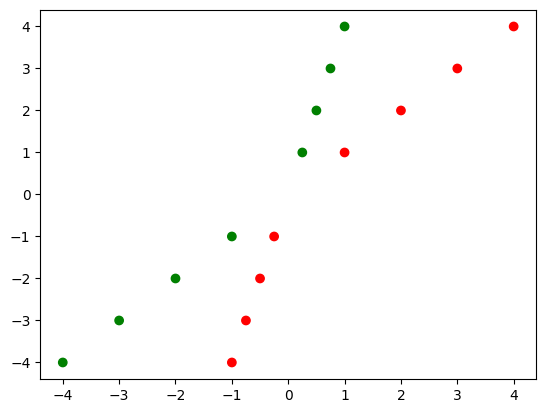

In [250]:
# Answer
y_color = np.where(y == 1, 'green', 'red')
plt.scatter(X[0, : ], X[1, : ], c = y_color)

In [251]:
d, n = X.shape
w = np.zeros(d)

while not np.array_equal(np.where(w @ X >= 0, 1, -1), y) :
  for i in range(n) :
    # Prediction
    y_hat = 1 if w @ X[ : , i] >= 0 else -1
    # mistake
    if y_hat != y[i] :
      w += X[ : , i] * y[i]

w

array([-1.25,  1.  ])

In [252]:
ratio = w[0]/w[1]
ratio

np.float64(-1.25)

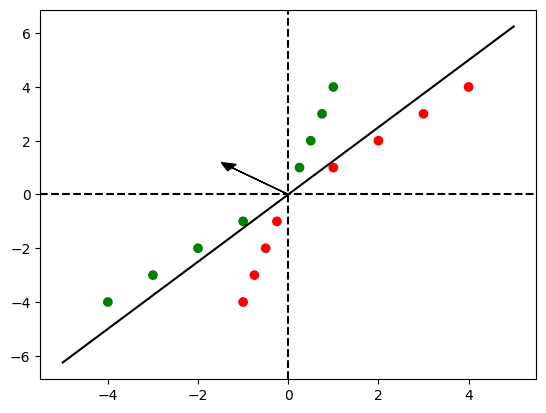

In [253]:
plt.scatter(X[ 0, : ], X[ 1, : ], c = y_color)

xx = np.linspace(-5, 5, 100)
yy = -w[0] / w[1] * xx

plt.axhline(linestyle = '--', color = 'black')
plt.axvline(linestyle = '--', color = 'black')
plt.plot(xx, yy, color = 'black')
plt.arrow(0,0, w[0], w[1], head_width = 0.3, head_length = 0.3, color = 'black')

## Common Data for questions (6) to (9)

Consider a dataset `X` of shape `(d, n)` for a clustering problem with three clusters. The initial cluster centers are given as `c_1`, `c_2` and `c_3`. Each center is of shape `(d, )`. Run K-Means algorithm on this dataset until convergence. Follow the algorithm given below:

- Initialize centers to `c_1`, `c_2`, `c_3`
- Until convergence
  - Compute cluster membership
  - Recompute cluster centers

`x_test` a test point of shape `(d, )`. Let `c_1_final, c_2_final, c_3_final` be the cluster centers after convergence.

<hr>

**NOTE**: The variables `X, c_1, c_2, c_3` and `x_test` are all given to you in the code cell given below.

In [254]:
rng = np.random.default_rng(seed = 1535)
X = np.array([
    [2.2, 3.1, 3.9], [2.1, 3.2, 3.8], [2.0, 2.9, 4.1], [2.1, 3.2, 3.9],
    [-4.1, -5.1, 3.8], [-4.2, -4.9, 3.9], [-3.9, -4.8, 4.2], [-3.8, -5.0, 4.1],
    [8.1, 9.2, -6.2], [8.2, 9.1, -6.1], [7.9, 9.1, -5.9], [8.1, 8.9, -5.8]
]).T
c_1, c_2, c_3 = (np.array([3, 3, 3]),
                 np.array([-6, -7, 5]),
                 np.array([10, 12, -7]))
x_test = np.array([0, 0, 0])

In [255]:
def membership(x) :
  return np.argmin([np.linalg.norm(c -x)
                    for c in clusters])

d,n = X.shape
clusters = [c_1, c_2, c_3]
memb = np.zeros(n)
old_memb = -np.ones(n)
iter = 0
while not np.array_equal(old_memb, memb) :
  old_memb = np.copy(memb)
  memb = np.array([membership(X[ : , i]) for i in range(n)])
  clusters = [X[ : , memb == i].mean(axis = 1) for i in range(3)]
  iter += 1

print(iter)
c_1_final, c_2_final, c_3_final = clusters

2


## Question-6 [3 Marks]

Find the sum of the components of `c_1_final`. Enter the nearest integer of this sum as your answer. You can use the built-in `round` function.

In [256]:
ans = round(c_1_final.sum())
ans

9

## Question-7 [3 Marks]

Find the sum of the components of `c_2_final`. Enter the nearest integer of this sum as your answer. You can use the built-in `round` function.

In [257]:
ans = round(c_2_final.sum())
ans

-5

## Question-8 [3 Marks]

Find the sum of the components of `c_3_final`. Enter the nearest integer of this sum as your answer. You can use the built-in `round` function.

In [258]:
ans = round(c_3_final.sum())
ans

11

## Question-9 [3 Marks]

To which cluster does the point `x_test` belong? Enter 1, 2 or 3 as your answer.

In [259]:
ans = membership(x_test) + 1
ans

np.int64(1)

# Question-10 [5 Marks]

Consider a hard-margin SVM trained on a linearly separable dataset $(\mathbf{X}, \mathbf{y})$. The optimal weight vector obtaind is $\mathbf{w}^{*}$:

$$
\begin{aligned}
\mathbf{X} &= \begin{bmatrix}
-1 & -1 & 0 & 1 & -1 & -2 & 0 & 1 & 1 & 2 & -1 & 2\\
1 & 2 & -1 & -4 & -1 & 1 & 1 & -2 & 0 & 2 & 4 & 0
\end{bmatrix}\\\\
\mathbf{y} &= \begin{bmatrix}
1 & 1 & 1 & 1 & 1 & 1 & -1 & -1 & -1 & -1 & -1 & -1
\end{bmatrix}^T\\\\
\mathbf{w}^{*} &= \begin{bmatrix}
-3 & -1
\end{bmatrix}^T
\end{aligned}
$$

$\mathbf{X}$ has shape $(d, n)$, $\mathbf{y}$ has shape $(n, )$ and $\mathbf{w}^{*}$ has shape $(d, )$.

Find the number of support vectors.

In [260]:
# Answer
X = np.array([
    [-1,1], [-1,2], [0,-1], [1,-4], [-1,-1], [-2,1], [0,1], [1,-2], [1,0], [2,2], [-1,4], [2,0]
]).T

y = np.concatenate((np.ones(6), - np.ones(6)))

w = [-3, -1]

ans = np.where((w @ X == 1) | (w @ X == -1), 1, 0).sum()
ans

np.int64(6)

In [261]:
# Check correctness

d,n = X.shape
Y = np.diag(y)
Q = Y.T @ X.T @ X @ Y

def f(alpha) :
  return 0.5 * (alpha @ Q @ alpha) - alpha.sum()

from scipy import optimize

alpha_init = np.zeros(n)

res = optimize.minimize(f, alpha_init, bounds = optimize.Bounds(lb = 0, ub = np.inf))

alpha = res.x
w = X @ Y @ alpha
w

array([-3.00000043, -1.00000006])

# Question-11 [5 Marks]

Consider the following data-points:

- $\mathbf{x}_1 = [1 \quad 1]^T$, $y_1 = -1$

- $\mathbf{x}_2 = [0 \quad -2]^T$, $y_2 = 1$

- $\mathbf{x}_3 = [1 \quad 1]^T$, $y_3 = -1$

- $\mathbf{x}_4 = [0 \quad -0.5]^T$, $y_4 = -1$

Exactly one out of these four points is added to the dataset given in the previous question and the SVM is trained again on this larger dataset.

In three out of four cases, the decision boundary will remain the same. It will change only for a particular data-point. Which data-point is this? Enter $1, 2, 3$ or $4$ as your answer.

In [262]:
X_1, y_1 = np.array([1,1]), -1
X_2, y_2 = np.array([0,-2]), 1
X_3, y_3 = np.array([1, 1]), -1
X_4, y_4 = np.array([0, -0.5]), -1

L = [(X_1, y_1), (X_2, y_2), (X_3, y_3), (X_4, y_4)]

for index, (x,y) in enumerate(L) :
  if w @ x * y < 1 :
    ans = index + 1

print(ans)

4


# Regression

There are two sub parts :
- Part-1
- Part-2

## Part-1 : Regression

In [263]:
# Generate synthetic data
np.random.seed(42)

# Number of samples and features
num_samples = 200
num_features = 5

# Generate random features
X = np.random.randn(num_samples, num_features)

# Generate true coefficients for each feature
true_coef = np.random.uniform(-2, 2, size=num_features)

# Generate noise
noise = np.random.normal(loc=0, scale=0.5, size=num_samples)

# Generate target variable
y = np.dot(X, true_coef) + noise

# Split data into training and test sets
split = int(0.8 * num_samples)  # 80% training, 20% test
X_train, X_test = X[:split].T, X[split:].T
y_train, y_test = y[:split], y[split:]

## Question-12 [3 Marks]

Add the dummy feature in both training and test dataset. If we learn the linear regression model on the training dataset (with the dummy feature added), how many weights need to be learned by the model?

In [264]:
d,n = X_train.shape
X_train = np.row_stack((np.ones(n), X_train))
d, n = X_test.shape
X_test = np.row_stack((np.ones(n), X_test))
d,n = X_train.shape

/tmp/ipython-input-3544125060.py:2: DeprecationWarning: `row_stack` alias is deprecated. Use `np.vstack` directly.
  X_train = np.row_stack((np.ones(n), X_train))
/tmp/ipython-input-3544125060.py:4: DeprecationWarning: `row_stack` alias is deprecated. Use `np.vstack` directly.
  X_test = np.row_stack((np.ones(n), X_test))


## Question-13 [5 Marks]

f $w$ is the weight vector learnt using the least squares linear regression model (normal equation method), what will be euclidean norm of $w$? Enter your answer correct to two decimal places.

In [265]:
w = np.linalg.pinv(X_train @ X_train.T) @ X_train @ y_train
ans = np.linalg.norm(w)
ans

np.float64(2.9370448516005494)

## Question-14 [5 Marks]

Find the root mean square error on the training dataset using the model defined in question $13$.

 $$\text{RMSE}  =  \sqrt{\dfrac{1}{n}\sum\limits_{i=1}^{n} (y_i- \hat{y}_i)^2}
$$

Enter your answer correct to two decimal places.


In [266]:
y_pred = w @ X_train
ans = np.sqrt(((y_pred - y_train) ** 2).mean())
ans

np.float64(0.5063574390918649)

## Queston-15 [5 Marks]

Find the root mean square error on the test dataset using the model defined in question 13. Enter your answer correct to two decimal places.


In [267]:
y_pred = w @ X_test
ans = np.sqrt(((y_pred - y_test) ** 2).mean())
ans

np.float64(0.46172728442989386)

## Question-16 [5 Marks]


Learn the ridge regression model on the training dataset for $\lambda = 0.01, 0.1, 1,$ and $10$. Which value of $\lambda$ gives the least training error?

In [268]:
lambs = [0.01, 0.1, 1, 10]
errors = [ ]
for lamb in lambs :
  w = np.linalg.pinv(X_train @ X_train.T + lamb * np.eye(d)) @ X_train @ y_train
  y_pred = w @ X_train
  errors.append(np.sqrt(((y_pred - y_train) ** 2).mean()))

ans = lambs[np.argmin(errors)]
ans

0.01

## Question-17 [6 Marks]

Learn the ridge regression model on the training dataset for $\lambda = 0.01, 0.1, 1,$ and $10$. Which value of $\lambda$ gives the least test error?


In [269]:
lambs = [0.01, 0.1, 1, 10]
errors = [ ]

for lamb in lambs :
  w = np.linalg.pinv(X_train @ X_train.T + lamb * np.eye(d)) @ X_train @ y_train
  y_pred = w @ X_test
  errors.append(np.sqrt(((y_pred - y_test) ** 2).mean()))

ans = lambs[np.argmin(errors)]
ans


1